# Seeds Data Analysis

In [295]:
# Import packages.
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


from sklearn.manifold import TSNE

# Read the data.
df = pd.read_table('./data/seeds_dataset.txt',sep="\t",header=None,
                   names=["area","perimeter","compactness","length","width","coef","groove","label"])

#### Attribute Information

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

## Data Preprocessing

In [240]:
np.shape(df)

(210, 8)

In [241]:
df.dtypes

area           float64
perimeter      float64
compactness    float64
length         float64
width          float64
coef           float64
groove         float64
label            int64
dtype: object

#### Replace numerical labels with wheat names

In [309]:
names = {1: 'Kama', 2: 'Rosa', 3: 'Canadian'}
df['label'] = df['label'].map(names)
df.head()

,area,perimeter,compactness,length,width,coef,groove,label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama


## Data Visualization

#### Perform PCA

In [340]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# standardize features
x = StandardScaler().fit_transform(x)

In [341]:
pca = PCA(n_components=5)
pca_fit = pca.fit_transform(x)
pca_fit_df = pd.DataFrame(pca_fit, columns = ['pc1','pc2','pc3','pc4','pc5'])
pca_df = pd.concat([pca_fit_df, df[['label']]], axis = 1)

#### Scree plot showing variance explained

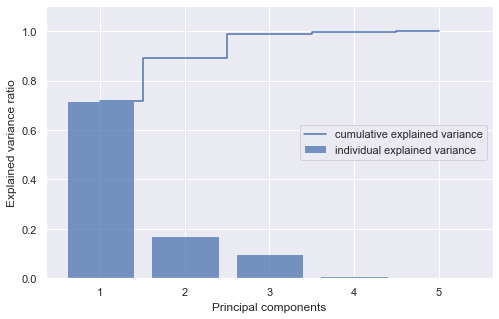

In [342]:
plt.figure(figsize=(8,5))
exp_var = pca.explained_variance_ratio_
cum_exp_var = np.cumsum(exp_var)

plt.bar(range(1, 6), exp_var, alpha=0.75, align='center',
        label='individual explained variance')
plt.step(range(1, 6), cum_exp_var, where='mid',
         label='cumulative explained variance')
plt.ylim(0, 1.1)
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.show()

#### 3 principle components and dependencies on original features

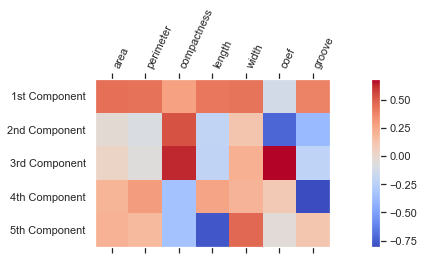

In [343]:
plt.figure(figsize=(15,3))
plt.matshow(pca.components_,cmap='coolwarm',fignum=1)

df_feat = df.drop(['label'], axis=1)
plt.xticks(range(len(df_feat.columns)),df_feat.columns,rotation=65,ha='left')
plt.yticks([0,1,2,3,4],['1st Component','2nd Component','3rd Component','4th Component','5th Component'])

plt.colorbar()
plt.grid(False)
plt.show()

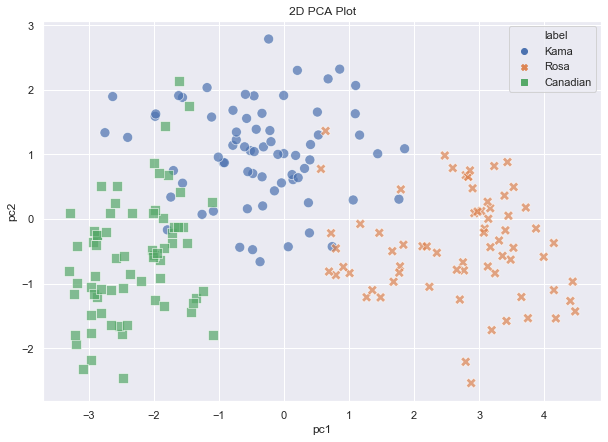

In [305]:
# Scale the data
x = StandardScaler().fit_transform(x)

# Perform PCA
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(x)
pc1, pc2 = pca_result[:, 0], pca_result[:, 1]
pca_df = pd.DataFrame(dict(pc1=pc1, pc2=pc2, label=y))

# Plot PCA
plt.figure(figsize=(10,7))
ax = sns.scatterplot(x='pc1', y='pc2', hue='label', style='label', data=pca_df, s = 100, alpha = 0.7)
plt.title('2D PCA Plot')
plt.show()

#### t-SNE

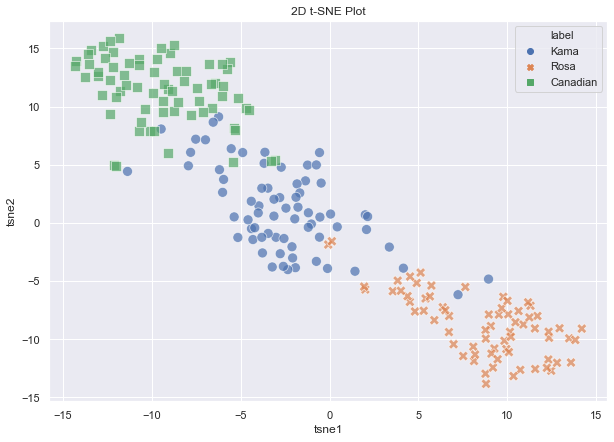

In [306]:
# Perform t-SNE
tsne = TSNE(n_components=2, learning_rate = 200)
tsne_results = tsne.fit_transform(x)
tsne1, tsne2 = tsne_results[:, 0], tsne_results[:, 1]
tsne_df = pd.DataFrame(dict(tsne1=tsne1, tsne2=tsne2, label=y))

# Plot t-SNE
plt.figure(figsize=(10,7))
ax = sns.scatterplot(x='tsne1', y='tsne2', hue='label', style='label', data=tsne_df, s = 100, alpha = 0.7)
plt.title('2D t-SNE Plot')
plt.show()

#### Clustering

##### Hierarchical clustering

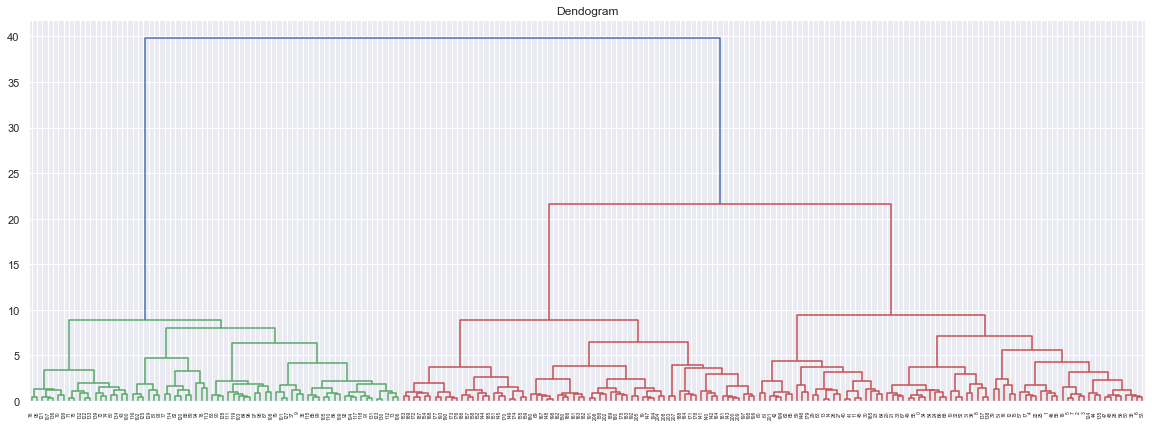

In [8]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 7))
plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(x, method='ward'))

Now we know there should be three clusters.

In [383]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2])

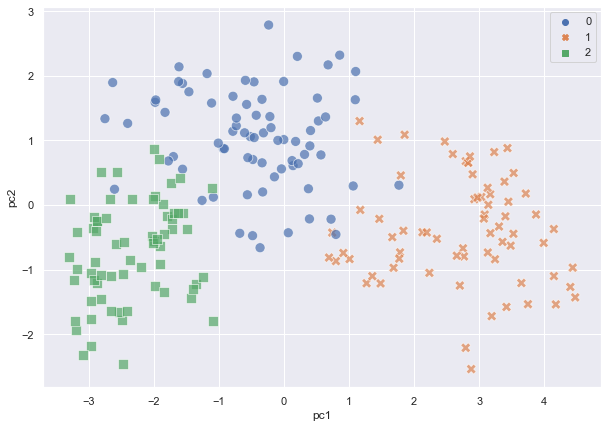

In [361]:
# Plot the clusters using the PCs, and color them using results from hierarchical clustering
plt.figure(figsize=(10, 7))
sns.scatterplot(pca_df.pc1, pca_df.pc2, 
                hue=np.array(cluster.labels_).astype(str), style=np.array(cluster.labels_).astype(str),
                s=100, alpha=0.7, palette='deep')

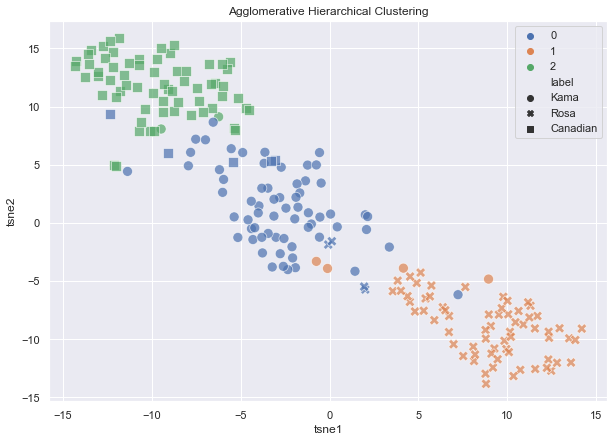

In [384]:
# Plot the clusters using the PCs, and color them using results from hierarchical clustering
plt.figure(figsize=(10, 7))
sns.scatterplot(tsne_df.tsne1, tsne_df.tsne2, 
                hue=np.array(cluster.labels_).astype(str), style=df['label'],
                s=100, alpha=0.7, palette='deep')
plt.title('Agglomerative Hierarchical Clustering')
plt.show()

##### K-means

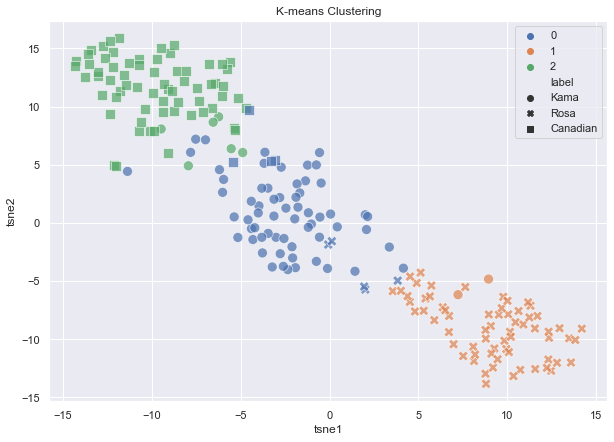

In [380]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=3, random_state=3)
cluster.fit_predict(x)

# Plot the clusters using the PCs, and color them using results from hierarchical clustering
plt.figure(figsize=(10, 7))
sns.scatterplot(tsne_df.tsne1, tsne_df.tsne2, 
                hue=np.array(cluster.labels_).astype(str), style=df['label'],
                s=100, alpha=0.7, palette='deep')

plt.title('K-means Clustering')
plt.show()

#### Clustermap

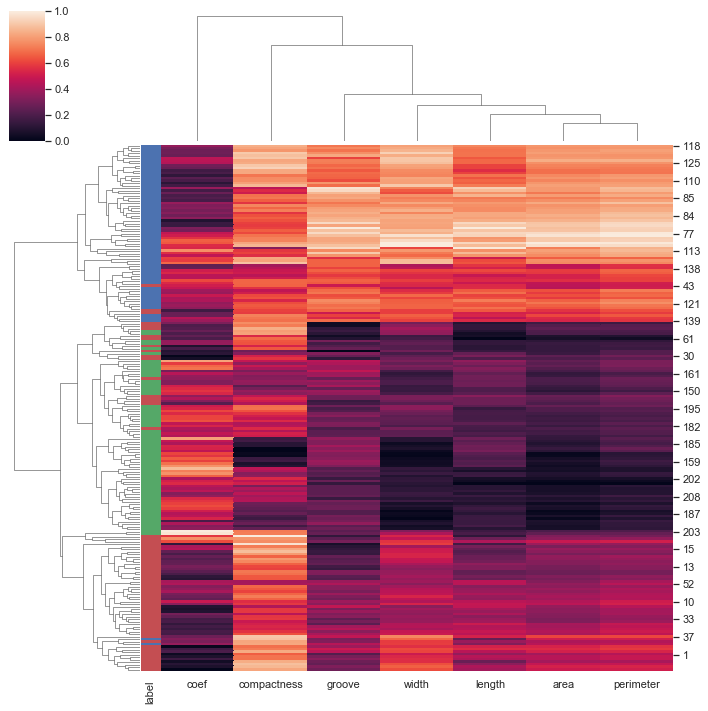

In [286]:
col = df['label'].map(dict(zip(df['label'].unique(), "rbg")))
sns.clustermap(df.iloc[:,:-1], standard_scale=1, row_colors=col)
plt.show()

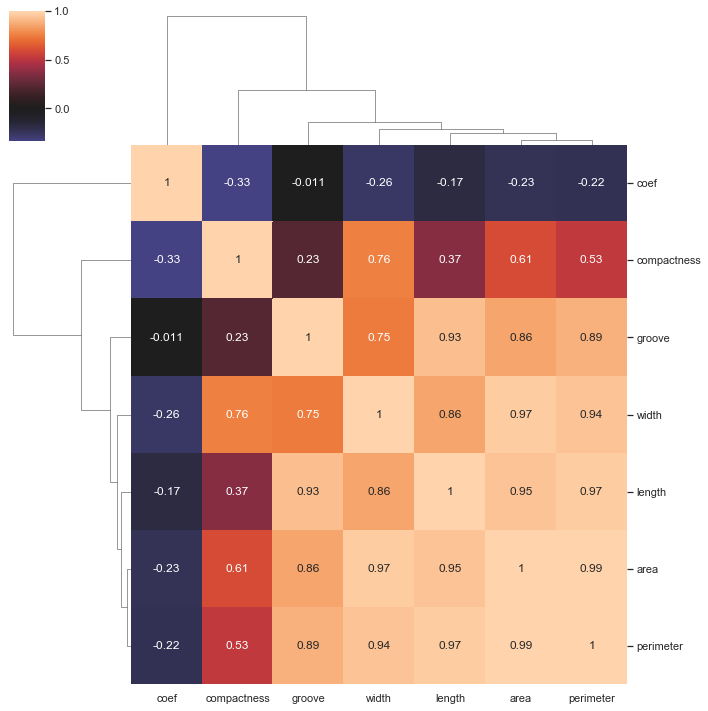

In [310]:
sns.clustermap(df.corr(), annot=True, center=0)

## Classification of Wheat Types

### Data Preprocessing

#### Train test split using stratified sampling

In [141]:
from sklearn.model_selection import train_test_split

X = df.drop('label',axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

pd.value_counts(y_train)/len(y_train)

3    0.333333
2    0.333333
1    0.333333
Name: label, dtype: float64

#### Feature scaling
Some machine learning algorithms I will use are based on distances so we should scale the data.

In [152]:
scaler = StandardScaler()

# Fit on training set
scaler.fit(X_train)

# Apply transform to both the training set and the test set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [142]:
# from sklearn.preprocessing import MinMaxScaler

# # Create the scaler object with a range of 0-1
# scaler = MinMaxScaler(feature_range=(0, 1))

# # Fit on the training data
# scaler.fit(X_train)

# # Transform both the training and testing data
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

### Modeling

#### Logistic Regression

In [190]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

model.predict(X_test)

# Evaluate model
print('Training accuracy : {:.2f}'.format(model.score(X_train, y_train)))
print('Testing accuracy : {:.2f}'.format(model.score(X_test, y_test)))
print('\n')
cv_score = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print('Mean CV score : {:.2f}'.format(cv_score.mean()))
print('Var CV score : {:.2f}'.format(cv_score.std()))

Training accuracy : 0.95
Testing accuracy : 0.92


Mean CV score : 0.90
Var CV score : 0.09


#### K-nearest Neighbors

In [191]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train,y_train)

model.predict(X_test)

# Evaluate model
print('Training accuracy : {:.2f}'.format(model.score(X_train, y_train)))
print('Testing accuracy : {:.2f}'.format(model.score(X_test, y_test)))
print('\n')
cv_score = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print('Mean CV score : {:.2f}'.format(cv_score.mean()))
print('Var CV score : {:.2f}'.format(cv_score.std()))

Training accuracy : 0.95
Testing accuracy : 0.89


Mean CV score : 0.88
Var CV score : 0.09


#### Support Vector Classifier

In [192]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train,y_train)

model.predict(X_test)

# Evaluate model
print('Training accuracy : {:.2f}'.format(model.score(X_train, y_train)))
print('Testing accuracy : {:.2f}'.format(model.score(X_test, y_test)))
print('\n')
cv_score = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print('Mean CV score : {:.2f}'.format(cv_score.mean()))
print('Var CV score : {:.2f}'.format(cv_score.std()))

Training accuracy : 0.95
Testing accuracy : 0.90


Mean CV score : 0.89
Var CV score : 0.11


#### Decision Tree

In [193]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

model.predict(X_test)

# Evaluate model
print('Training accuracy : {:.2f}'.format(model.score(X_train, y_train)))
print('Testing accuracy : {:.2f}'.format(model.score(X_test, y_test)))
print('\n')
cv_score = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print('Mean CV score : {:.2f}'.format(cv_score.mean()))
print('Var CV score : {:.2f}'.format(cv_score.std()))

Training accuracy : 1.00
Testing accuracy : 0.94


Mean CV score : 0.90
Var CV score : 0.03


#### Random Forest

In [194]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

model.predict(X_test)

# Evaluate model
print('Training accuracy : {:.2f}'.format(model.score(X_train, y_train)))
print('Testing accuracy : {:.2f}'.format(model.score(X_test, y_test)))
print('\n')
cv_score = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print('Mean CV score : {:.2f}'.format(cv_score.mean()))
print('Var CV score : {:.2f}'.format(cv_score.std()))

Training accuracy : 1.00
Testing accuracy : 0.83


Mean CV score : 0.88
Var CV score : 0.12


#### Ada Boost Classifier

In [195]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train, y_train)

model.predict(X_test)

# Evaluate model
print('Training accuracy : {:.2f}'.format(model.score(X_train, y_train)))
print('Testing accuracy : {:.2f}'.format(model.score(X_test, y_test)))
print('\n')
cv_score = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print('Mean CV score : {:.2f}'.format(cv_score.mean()))
print('Var CV score : {:.2f}'.format(cv_score.std()))

Training accuracy : 0.69
Testing accuracy : 0.73


Mean CV score : 0.73
Var CV score : 0.15


#### Xg Boost Classifier

In [196]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

model.predict(X_test)

# Evaluate model
print('Training accuracy : {:.2f}'.format(model.score(X_train, y_train)))
print('Testing accuracy : {:.2f}'.format(model.score(X_test, y_test)))
print('\n')
cv_score = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print('Mean CV score : {:.2f}'.format(cv_score.mean()))
print('Var CV score : {:.2f}'.format(cv_score.std()))

Training accuracy : 1.00
Testing accuracy : 0.86


Mean CV score : 0.90
Var CV score : 0.06


#### Multi Layer Perceptron

In [197]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes = (100, 100), max_iter = 1000)
model.fit(X_train, y_train)

model.predict(X_test)

# Evaluate model
print('Training accuracy : {:.2f}'.format(model.score(X_train, y_train)))
print('Testing accuracy : {:.2f}'.format(model.score(X_test, y_test)))
print('\n')
cv_score = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print('Mean CV score : {:.2f}'.format(cv_score.mean()))
print('Var CV score : {:.2f}'.format(cv_score.std()))

Training accuracy : 1.00
Testing accuracy : 0.92


Mean CV score : 0.91
Var CV score : 0.08


#### Neural Network

In [198]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Define keras model
model = Sequential()
model.add(Dense(5, input_dim=7, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the keras model on the dataset
model.fit(X_train, y_train, epochs=20, batch_size=10, verbose=False)

# Evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Training accuracy: %.2f' % (accuracy*100))
_, accuracy = model.evaluate(X_test, y_test)
print('Testing accuracy: %.2f' % (accuracy*100))

147/147 [==============================] - 0s 2ms/step
Training accuracy: 33.33
63/63 [==============================] - 0s 97us/step
Testing accuracy: 33.33
